Name : ch. surya

USN : 21BTRCL025

Course : Deep Learning Lab

Course Code : 21CS6AM11L

Lab Assignment - 1 (Project - 1) :

---
-> stop sign detecting project utilizes numpy, pandas , keras for preprocessing and to build also for train a convolutional neural network (CNN) and using of vgg16 which is per - structured fillters

---

-> The model achieves an accuracy of around 97% on the test dataset after 5 epochs of training.

---

-> The project also includes visualizations loss(both total loss and val_los) and accuracy(toal and val_accuracy) for each epochs

---
-> The final objective is to train the model to accurately predict the class labels of unseen images and achieving high performance on the test dataset.



# loading the  modules

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator #augment  images
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.callbacks import Callback, ModelCheckpoint # to get a view on internal states and statistics of the model during training
#define where to checkpoint the model weights, how to name the file
from keras.applications.vgg16 import VGG16 #Very Deep Convolutional Networks
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

import warnings
warnings.filterwarnings('ignore')

# Load the pretrained Network

In [3]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

# Freeze the layers

In [4]:
for layer in model_vgg16_conv.layers:
    layer.trainable = False

# Training parameters

In [5]:
img_width, img_height = 150, 150
train_data_dir = "C:\\Users\\chsur\\cv\\dl_cnn_pro1\\train"
val_data_dir = "C:\\Users\\chsur\\cv\\dl_cnn_pro1\\val"
model_weights_file = 'vgg16-xfer-weights.h5'
nb_epochs = 5

# Build a classification model on top of Base Network

In [6]:
input = Input(shape=(img_width, img_height, 3))
output_vgg16_conv = model_vgg16_conv(input)
x = Flatten()(output_vgg16_conv)
x = Dense(64, activation='relu')(x)
x = Dense(2, activation='softmax')(x)
model = Model(input, x)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Dataset Preparation

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
#augment  images
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=4)
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height),
                                                        batch_size=4)

Found 197 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


# Training

In [8]:
callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit_generator( train_generator, epochs=5, callbacks = callbacks, validation_data=validation_generator)
print('Training Completed!')

Epoch 1/5


50/50 [==============================] - 14s 263ms/step - loss: 0.7904 - accuracy: 0.7157 - val_loss: 0.7386 - val_accuracy: 0.6667
Epoch 2/5
50/50 [==============================] - 13s 256ms/step - loss: 0.4271 - accuracy: 0.8223 - val_loss: 1.4943 - val_accuracy: 0.3333
Epoch 3/5
50/50 [==============================] - 12s 239ms/step - loss: 0.3447 - accuracy: 0.8680 - val_loss: 1.5717 - val_accuracy: 0.3333
Epoch 4/5
50/50 [==============================] - 12s 241ms/step - loss: 0.2292 - accuracy: 0.9188 - val_loss: 0.8187 - val_accuracy: 0.6667
Epoch 5/5
50/50 [==============================] - 12s 240ms/step - loss: 0.2013 - accuracy: 0.9086 - val_loss: 2.7256 - val_accuracy: 0.3333
Training Completed!


In [9]:
history.history

{'loss': [0.7903850674629211,
  0.4270646870136261,
  0.3446967303752899,
  0.22919432818889618,
  0.20125198364257812],
 'accuracy': [0.7157360315322876,
  0.8223350048065186,
  0.8680202960968018,
  0.9187816977500916,
  0.9086294174194336],
 'val_loss': [0.738557755947113,
  1.4942723512649536,
  1.5716840028762817,
  0.8187223076820374,
  2.7256174087524414],
 'val_accuracy': [0.6666666865348816,
  0.3333333432674408,
  0.3333333432674408,
  0.6666666865348816,
  0.3333333432674408]}

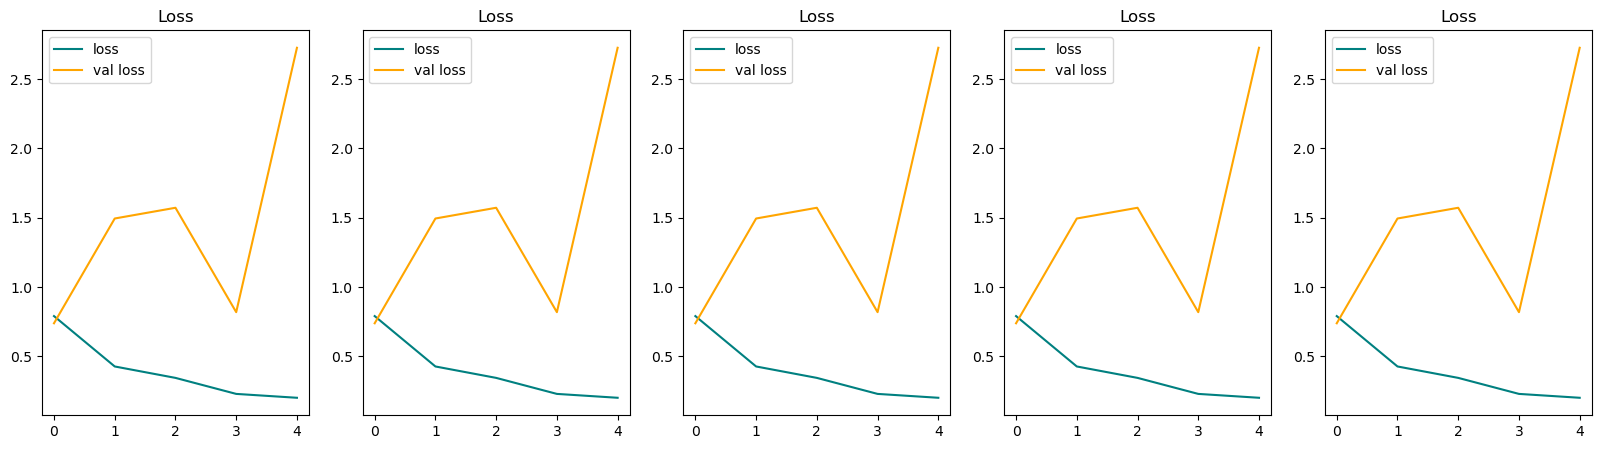

In [10]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='loss')
ax[0].plot(history.history['val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['loss'], color='teal', label='loss')
ax[1].plot(history.history['val_loss'], color='orange', label='val loss')
ax[1].title.set_text('Loss')
ax[1].legend()

ax[2].plot(history.history['loss'], color='teal', label='loss')
ax[2].plot(history.history['val_loss'], color='orange', label='val loss')
ax[2].title.set_text('Loss')
ax[2].legend()

ax[3].plot(history.history['loss'], color='teal', label='loss')
ax[3].plot(history.history['val_loss'], color='orange', label='val loss')
ax[3].title.set_text('Loss')
ax[3].legend()

ax[4].plot(history.history['loss'], color='teal', label='loss')
ax[4].plot(history.history['val_loss'], color='orange', label='val loss')
ax[4].title.set_text('Loss')
ax[4].legend()


plt.show()

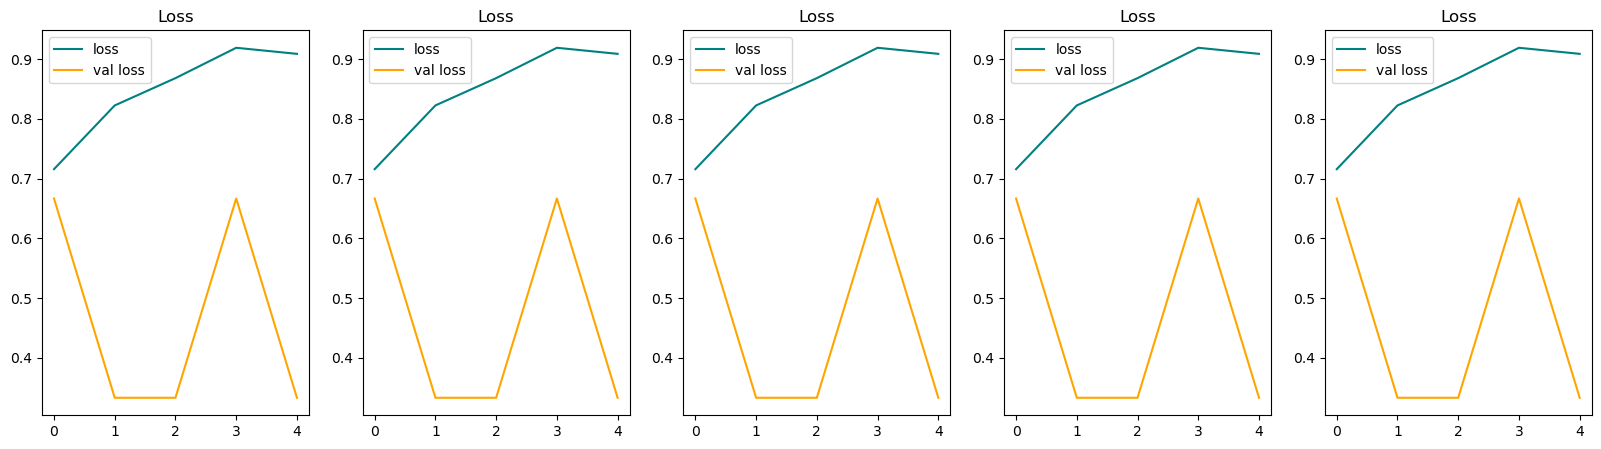

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))

ax[0].plot(history.history['accuracy'], color='teal', label='loss')
ax[0].plot(history.history['val_accuracy'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='teal', label='loss')
ax[1].plot(history.history['val_accuracy'], color='orange', label='val loss')
ax[1].title.set_text('Loss')
ax[1].legend()

ax[2].plot(history.history['accuracy'], color='teal', label='loss')
ax[2].plot(history.history['val_accuracy'], color='orange', label='val loss')
ax[2].title.set_text('Loss')
ax[2].legend()

ax[3].plot(history.history['accuracy'], color='teal', label='loss')
ax[3].plot(history.history['val_accuracy'], color='orange', label='val loss')
ax[3].title.set_text('Loss')
ax[3].legend()

ax[4].plot(history.history['accuracy'], color='teal', label='loss')
ax[4].plot(history.history['val_accuracy'], color='orange', label='val loss')
ax[4].title.set_text('Loss')
ax[4].legend()

# Test the model

In [12]:
from keras.applications.vgg16 import preprocess_input, decode_predictions


img_path = "C:\\Users\\chsur\\cv\\dl_cnn_pro1\\val\\product-500x500.webp"

label = ['stop','not stop']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
ind = np.where(features == 1)[1][0]
print('Predicted Array:',features)
print('Predicted Label:',label[ind])



1/1 [==============================] - 0s 220ms/step
Predicted Array: [[0. 1.]]
Predicted Label: not stop
